In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import os
import numpy as np
import pandas as pd
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!unzip /content/drive/MyDrive/rice.zip

In [4]:
yol = "/content/Rice_Image_Dataset"

In [5]:
files = glob.glob(yol+"/*/"+"*.jpg")

In [6]:
files[-20]

'/content/Rice_Image_Dataset/Karacadag/Karacadag (9282).jpg'

In [7]:
files[:5]

['/content/Rice_Image_Dataset/Ipsala/Ipsala (8641).jpg',
 '/content/Rice_Image_Dataset/Ipsala/Ipsala (4895).jpg',
 '/content/Rice_Image_Dataset/Ipsala/Ipsala (12453).jpg',
 '/content/Rice_Image_Dataset/Ipsala/Ipsala (8074).jpg',
 '/content/Rice_Image_Dataset/Ipsala/Ipsala (14201).jpg']

In [8]:
len(files)

75000

In [31]:
data = []
labels = []

for file in files:

  #dosya yolu ile klasör adını ayır
  folder_name = file.split("/")[-2]

  #klasör adına göre etiket değerlerini belirle
  if folder_name == "Ipsala":
    label=0

  elif folder_name =="Karacadag":
    label=1

  elif folder_name =="Jasmine":
    label=2

  elif folder_name =="Basmati":
    label=3

  elif folder_name =="Arborio":
    label=4
  

  #resmi oku, boyutunu ayarla ve veri listesine ekle
  img=cv2.imread(file)
  img=cv2.resize(img,(30,30))
  data.append(img)

  #etiketi listeye ekle
  labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [32]:
folder_name

'Karacadag'

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test,y_train,y_test = train_test_split(data,labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [35]:
x_train.shape

(60000, 30, 30, 3)

In [36]:
x_test.shape

(15000, 30, 30, 3)

In [37]:
y_train.shape

(60000,)

In [38]:
y_test.shape

(15000,)

In [39]:
ipsala_examples=x_train[y_train==0][0]
karacadag_examples=x_train[y_train==1][0]
jasmine_examples=x_train[y_train==2][0]
basmati_examples=x_train[y_train==3][0]
arborio_examples=x_train[y_train==4][0]

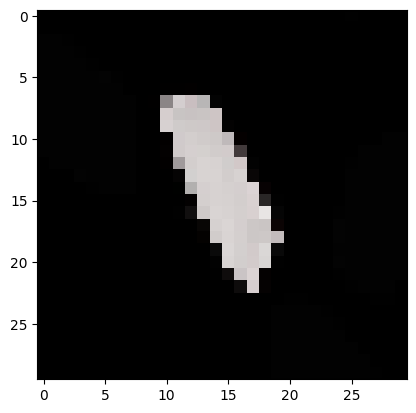

In [63]:
plt.imshow(jasmine_examples)

In [59]:
num_classes=5
num_examples=5 #her bir sınıf için seçilecek örnek sayısı
random_examples=[]


for i in range(num_classes):
  class_examples = x_train[y_train==i] #y_train içindeki tüm etiketlerin sınıfını belirtir
  num_examples = min(num_examples,len(class_examples))# num_examples değişkenine belirtilen sayıdan daha az örnek varsa mevcut örnek sayısını alır yoksa belirtilen sayı kadar rastgele örnek seçer
  random_examples.append(class_examples[:num_examples])

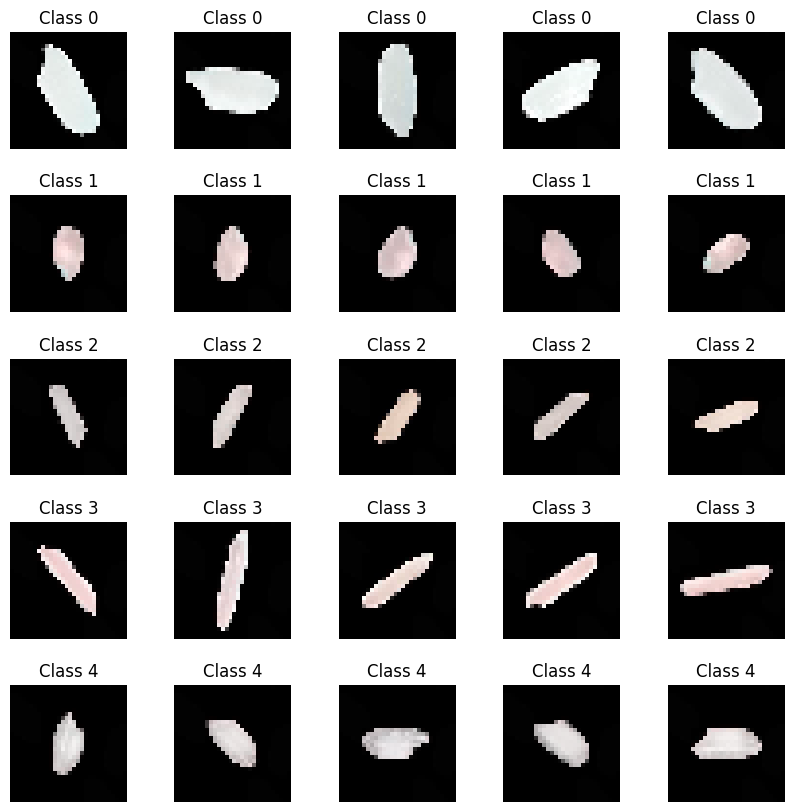

In [65]:
fig, axs = plt.subplots(nrows=num_classes, 
                        ncols=num_examples,
                        figsize=(10,10))

fig.subplots_adjust(hspace=0.4,wspace=0.4) # yatay(wspace),dikey(hspace) mesafelerini ayarlamak için kullandık

for i in range(num_examples):
  for j in range(num_examples):
    axs[i,j].imshow(random_examples[i][j])
    axs[i,j].axis("off")
    axs[i,j].set_title("Class {}".format(i))

plt.show()


## <font color="purple"> Build Artifical Neural Network for Image Classification

In [66]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

In [70]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(43,activation="softmax"))

In [71]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [74]:
history=model.fit(x_train,y_train,epochs=7,batch_size=20,
                  validation_data=(x_test,y_test))


Epoch 1/7
3000/3000 [==============================] - 352s 117ms/step - loss: 0.2171 - accuracy: 0.9255 - val_loss: 0.1128 - val_accuracy: 0.9611
Epoch 2/7
3000/3000 [==============================] - 346s 115ms/step - loss: 0.1511 - accuracy: 0.9508 - val_loss: 0.1056 - val_accuracy: 0.9645
Epoch 3/7
3000/3000 [==============================] - 344s 115ms/step - loss: 0.1183 - accuracy: 0.9624 - val_loss: 0.0771 - val_accuracy: 0.9735
Epoch 4/7
3000/3000 [==============================] - 347s 116ms/step - loss: 0.1044 - accuracy: 0.9682 - val_loss: 0.0581 - val_accuracy: 0.9802
Epoch 5/7
3000/3000 [==============================] - 347s 116ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.0719 - val_accuracy: 0.9767
Epoch 6/7
3000/3000 [==============================] - 344s 115ms/step - loss: 0.0945 - accuracy: 0.9713 - val_loss: 0.1226 - val_accuracy: 0.9621
Epoch 7/7
3000/3000 [==============================] - 347s 116ms/step - loss: 0.0936 - accuracy: 0.9724 - val_loss: 0

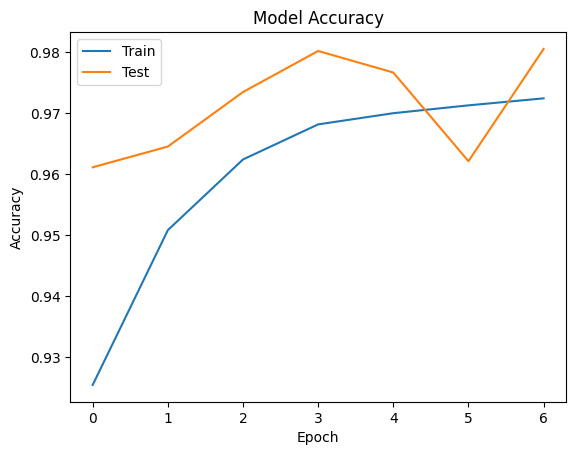

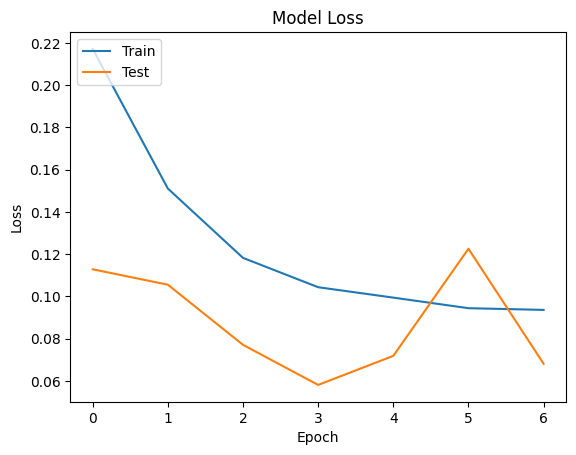

In [75]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()